In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import LinearRegression
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans

In [4]:
xdata_train = np.load('datasetA_X_train.npy')
xdata_test = np.load('datasetA_X_test.npy')
ydata_train = np.load('datasetA_y_train.npy')
ydata_test = np.load('datasetA_y_test.npy')

In [5]:
print(f'xdata_train.shape:{xdata_train.shape}')
print(f'xdata_test.shape:{xdata_test.shape}')
print(f'ydata_train.shape:{ydata_train.shape}')
print(f'ydata_test.shape:{ydata_test.shape}')

xdata_train.shape:(4000, 2)
xdata_test.shape:(2000, 2)
ydata_train.shape:(4000,)
ydata_test.shape:(2000,)


In [72]:
def gamma_d(M):
    return M / 200

In [105]:
def Network(xdata, miu, gamma, ydata):
    layer1 = rbf_kernel(xdata, miu, gamma = gamma)
    layer2 = LinearRegression().fit(layer1, ydata)
    return layer2

In [23]:
def RMSE_y(ydata):
    # Compute the mean value of y on the training set
    y_mean = np.mean(ydata)
    y_trival = np.ones(ydata.shape) * y_mean

    # Compute the root mean squared error (RMSE)
    rmse = np.sqrt(mean_squared_error(y_trival, ydata))
    return rmse
RMSE_y(ydata_train)

3.2035150890062902

In [19]:
def RMSE(xdata, ydata, reg):
    predict = reg.predict(xdata)
    MSE = mean_squared_error(ydata, predict)
    return np.sqrt(MSE)

## Question c

Choose the basis function centers as the data points: μ_m = x_m , m = 1,2,...N , in which
N is the number of training data points during each fold in cross validation. For this part, the only hyperparameter to choose during model selection is γ.

In [160]:
def model_selection_c(xdata, ydata):
    gamma = gamma_d(3000)
    RMSE_train_list = np.zeros([6, 4])
    RMSE_val_list = np.zeros([6, 4])
    MSE_list = np.zeros([6, 4])
#     p_list = np.zeros(4)
    
    gamma_range = np.array([0.01, 0.1, 1, 10, 100, 1000]) * np.array(gamma)
    print(f'Gamma range is {gamma_range}')
    idx = 0 # in range of 6
    for p in gamma_range:
        
        # Define the cross-validation object
        cv = KFold(n_splits=4)
        for i, (train_index, val_index) in enumerate(cv.split(xdata)): # i in range of 4
            D_train_xdata = xdata[train_index]
            D_train_ydata = ydata[train_index]
            D_val_xdata = xdata[val_index]
            D_val_ydata = ydata[val_index]
        
            model = Network(D_train_xdata, D_train_xdata, p, D_train_ydata) # 3000 * 3000
            
            kernel = rbf_kernel(D_val_xdata, D_train_xdata, p) # 1000 * 3000
            predict = model.predict(kernel)
            MSE = mean_squared_error(D_val_ydata, predict)
            MSE_list[idx][i] = MSE
            RMSE_val_list[idx][i] = np.sqrt(MSE)
            
            kernel_train = rbf_kernel(D_train_xdata, D_train_xdata, p)
            predict_train = model.predict(kernel_train)
            MSE_train = mean_squared_error(D_train_ydata, predict_train)
            RMSE_train_list[idx][i] = np.sqrt(MSE_train)
            
        idx += 1
    return gamma_range, RMSE_train_list, RMSE_val_list
        
    

In [210]:
gamma_range_c, RMSE_train_list_c, RMSE_val_list_c = model_selection_c(xdata_train, ydata_train )

Gamma range is [1.5e-01 1.5e+00 1.5e+01 1.5e+02 1.5e+03 1.5e+04]


In [211]:
RMSE_mean_train_c = np.mean(RMSE_train_list_c, axis = 1)
RMSE_std_train_c = np.std(RMSE_train_list_c, axis = 1)
RMSE_mean_val_c = np.mean(RMSE_val_list_c, axis = 1)
RMSE_std_val_c = np.std(RMSE_val_list_c, axis = 1)



print(f'The mean of train RMSE is {RMSE_mean_train_c}')
print(f'The mean of validatation RMSE is {RMSE_mean_val_c}')
print(f'The std of train RMSE is {RMSE_std_train_c}')
print(f'The std of validatation RMSE is {RMSE_std_val_c}')

print(f'Therefore, the best gamma is {gamma_range_c[np.argmin(RMSE_mean_val_c)]}')

The mean of train RMSE is [1.13475822e+00 3.11643033e-02 3.05638622e-08 3.58646810e-12
 3.23542139e-14 2.06211531e-14]
The mean of validatation RMSE is [1.15403078e+00 3.66475529e-02 7.73597943e-07 5.21484373e-03
 1.75331839e+00 2.86271151e+00]
The std of train RMSE is [7.33129502e-02 3.26677428e-03 7.91081453e-09 5.94505790e-13
 5.27441228e-15 3.43880324e-16]
The std of validatation RMSE is [7.89945707e-02 5.67047695e-03 5.96283883e-07 3.39567285e-03
 3.53033549e-01 4.21701206e-02]
Therefore, the best gamma is 15.0


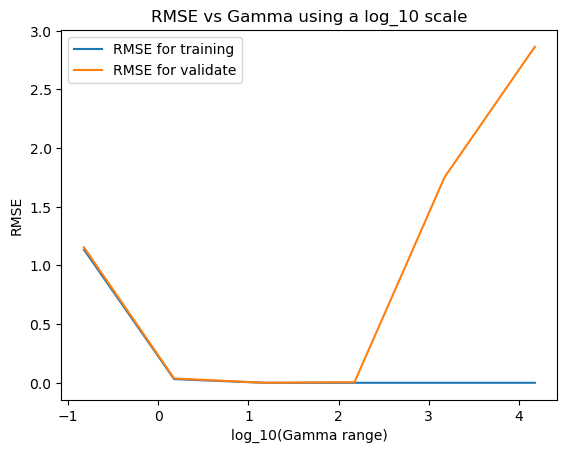

In [213]:
def plot_RMSE_gamma(RMSE_train_list,RMSE_val_list, gamma_range):
    gamma_range = np.log10(gamma_range)
    plt.plot(gamma_range,RMSE_train_list, label = 'RMSE for training')    
    plt.plot(gamma_range,RMSE_val_list, label = 'RMSE for validate')
    plt.xlabel('log_10(Gamma range)')
    plt.ylabel('RMSE')
    plt.title("RMSE vs Gamma using a log_10 scale")
    plt.legend()
    plt.show()
    

plot_RMSE_gamma(RMSE_mean_train_c,RMSE_mean_val_c, gamma_range_c )

## Question d

Randomly choose the basis function centers, without replacement, from the training-set data. Use number of basis function centers M varying from 30 to 300 (e.g., values 30, 60, 100, 300, 600).

In [221]:
def model_selection_d(xdata, ydata):
    M_range = [30, 60, 100, 300, 600]
    RMSE_train_list = np.zeros([len(M_range), 6])
    RMSE_val_list = np.zeros([len(M_range), 6])
    RMSE_train_std = np.zeros([len(M_range), 6])
    RMSE_val_std = np.zeros([len(M_range), 6])
    
    gamma_range_M = []
    
    for k in range(len(M_range)):
        
        gamma = gamma_d(M_range[k])
        gamma_range = np.array([0.01, 0.1, 1, 10, 100, 1000]) * np.array(gamma)
        print(f'Gamma range is {gamma_range}')
        gamma_range_M.append(gamma_range)
        idx = 0 # idx in range of 6
        for p in gamma_range:
            # Define the cross-validation object
            cv = KFold(n_splits=4)
            train_history = []
            val_history = []
            
            for i, (train_index, val_index) in enumerate(cv.split(xdata)): # i in range of 4
                D_train_xdata = xdata[train_index]
                D_train_ydata = ydata[train_index]
                D_val_xdata = xdata[val_index]
                D_val_ydata = ydata[val_index]
                
                miu = D_train_xdata[np.random.choice(len(D_train_xdata), size = M_range[k], replace = False)]

                model = Network(D_train_xdata, miu, p, D_train_ydata) # 

                kernel = rbf_kernel(D_val_xdata, miu, p) # 1000， 3000
                predict = model.predict(kernel)
                MSE = mean_squared_error(D_val_ydata, predict)
                val_history.append(np.sqrt(MSE))
                
                kernel_train = rbf_kernel(D_train_xdata, miu, p)
                predict_train = model.predict(kernel_train)
                MSE_train = mean_squared_error(D_train_ydata, predict_train)
                train_history.append(np.sqrt(MSE_train))
            
            # Calculate the mean value of each gamma
            RMSE_train_list[k][idx] = np.mean(train_history)
            RMSE_val_list[k][idx] = np.mean(val_history)
            RMSE_train_std[k][idx] = np.std(train_history)
            RMSE_val_std[k][idx] = np.std(val_history)
            idx += 1
    return gamma_range_M, RMSE_train_list, RMSE_val_list, RMSE_train_std, RMSE_val_std


In [227]:
gamma_range_d, RMSE_train_list_d, RMSE_val_list_d, RMSE_train_std_d, RMSE_val_std_d = model_selection_d(xdata_train, ydata_train)

Gamma range is [1.5e-03 1.5e-02 1.5e-01 1.5e+00 1.5e+01 1.5e+02]
Gamma range is [3.e-03 3.e-02 3.e-01 3.e+00 3.e+01 3.e+02]
Gamma range is [5.e-03 5.e-02 5.e-01 5.e+00 5.e+01 5.e+02]
Gamma range is [1.5e-02 1.5e-01 1.5e+00 1.5e+01 1.5e+02 1.5e+03]
Gamma range is [3.e-02 3.e-01 3.e+00 3.e+01 3.e+02 3.e+03]


In [300]:
# RMSE_mean_train = np.mean(RMSE_train_list)
# RMSE_std_train = np.std(RMSE_train_list)
# RMSE_mean_val = np.mean(RMSE_val_list, axis = 1)
# RMSE_std_val = np.std(RMSE_val_list, axis = 1)



print(f'The mean of train RMSE is {RMSE_train_list_d}')
print(f'The mean of validatation RMSE is {RMSE_val_list_d}')
print(f'The std of train RMSE is {RMSE_train_std_d}')
print(f'The std of validatation RMSE is {RMSE_val_std_d}')


# print(np.argmin(RMSE_val_list))
print(np.asarray(gamma_range_d))
best_idx = 4
M_range = [30, 60, 100, 300, 600]
# gamma_range_array = np.asarray(gamma_range_d).reshape(-1)
print(f'The best gamma is {gamma_range_array[np.argmin(RMSE_train_list_d)]}, the M = {M_range[best_idx]}')

The mean of train RMSE is [[4.45179750e+00 1.91465386e+00 1.60695655e+00 1.59816478e+00
  1.71101813e+00 2.83645023e+00]
 [2.28085926e+00 1.59204191e+00 1.15356872e+00 8.10422413e-01
  1.30890640e+00 2.72435322e+00]
 [3.33697895e+00 1.44370894e+00 5.96414971e-01 2.14450588e-01
  1.06422059e+00 2.79012141e+00]
 [3.35493428e+00 1.17856910e+00 4.10191996e-02 4.47287837e-03
  9.15911706e-01 2.70222241e+00]
 [2.30346963e+00 6.97067038e-01 2.48271892e-03 1.79378026e-03
  8.75490450e-01 2.52306720e+00]]
The mean of validatation RMSE is [[4.44080402e+00 1.95377118e+00 1.61148995e+00 1.60435959e+00
  1.71059315e+00 2.83699548e+00]
 [2.32321219e+00 1.64184933e+00 1.19648210e+00 8.37349842e-01
  1.31558598e+00 2.78517231e+00]
 [3.34377336e+00 1.45976893e+00 6.24635057e-01 2.23584693e-01
  1.08798621e+00 2.83303000e+00]
 [3.35234670e+00 1.20668983e+00 4.53877066e-02 5.75480131e-03
  1.01493664e+00 2.81418989e+00]
 [2.28566428e+00 7.30729809e-01 3.41404257e-03 2.97683835e-03
  1.04051149e+00 2.8137

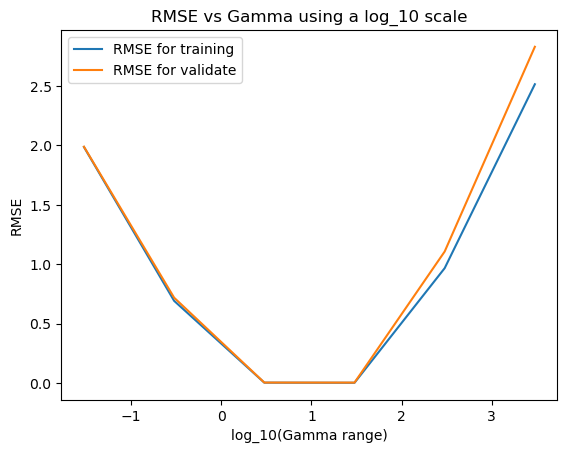

In [224]:
plot_RMSE_gamma(RMSE_train_list_d[best_idx],RMSE_val_list_d[best_idx], np.asarray(gamma_range_d)[best_idx])

In [244]:
def RCC_d(xdata, ydata):
    M_range = [30, 60, 100, 300, 600]
    RMSE_train_list = np.zeros([len(M_range), 6])
    RMSE_val_list = np.zeros([len(M_range), 6])
    RMSE_train_std = np.zeros([len(M_range), 6])
    RMSE_val_std = np.zeros([len(M_range), 6])
    
    checkpoint = RMSE_y(ydata)
    
    gamma_range_M = []
    
    for k in range(len(M_range)):
        
        gamma = gamma_d(M_range[k])
        gamma_range = np.array([0.01, 0.1, 1, 10, 100, 1000]) * np.array(gamma)
        print(f'Gamma range is {gamma_range}')
        gamma_range_M.append(gamma_range)
        idx = 0 # idx in range of 6
        for p in gamma_range:
            # Define the cross-validation object
            cv = KFold(n_splits=4)
#             train_history = []
            val_history = []
            
            for i, (train_index, val_index) in enumerate(cv.split(xdata)): # i in range of 4
                D_train_xdata = xdata[train_index]
                D_train_ydata = ydata[train_index]
                D_val_xdata = xdata[val_index]
                D_val_ydata = ydata[val_index]
                
                miu = D_train_xdata[np.random.choice(len(D_train_xdata), size = M_range[k], replace = False)]

                model = Network(D_train_xdata, miu, p, D_train_ydata)

                kernel = rbf_kernel(D_val_xdata, miu, p) # 1000， 3000
                predict = model.predict(kernel)
                MSE = mean_squared_error(D_val_ydata, predict)
                val_history.append(np.sqrt(MSE))
                
#                 kernel_train = rbf_kernel(D_train_xdata, miu, p)
#                 predict_train = model.predict(kernel_train)
#                 MSE_train = mean_squared_error(D_train_ydata, predict_train)
#                 train_history.append(np.sqrt(MSE_train))
            
            # Calculate the mean value of each gamma
            if(np.mean(val_history) < checkpoint / 10):
                return M_range[k], p


In [245]:
M_rcc_d, gamma_rcc_d = RCC_d(xdata_train, ydata_train)

Gamma range is [1.5e-03 1.5e-02 1.5e-01 1.5e+00 1.5e+01 1.5e+02]
Gamma range is [3.e-03 3.e-02 3.e-01 3.e+00 3.e+01 3.e+02]
Gamma range is [5.e-03 5.e-02 5.e-01 5.e+00 5.e+01 5.e+02]


In [246]:
print(f'The smallest M is {M_rcc_d}, the gamma = {gamma_rcc_d}')

The smallest M is 100, the gamma = 5.0


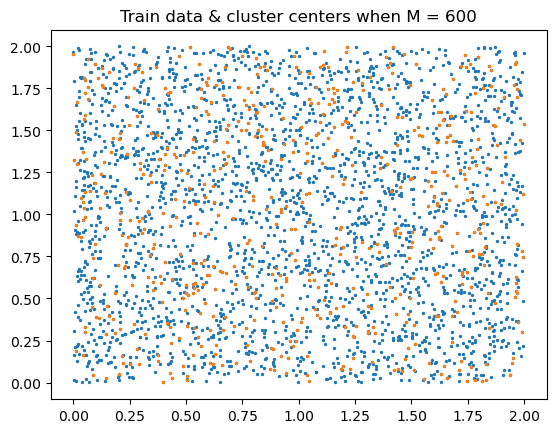

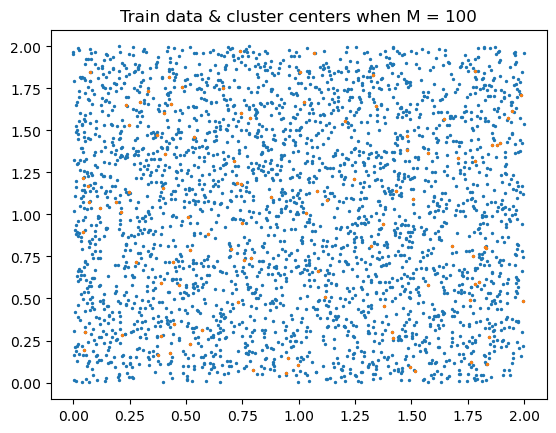

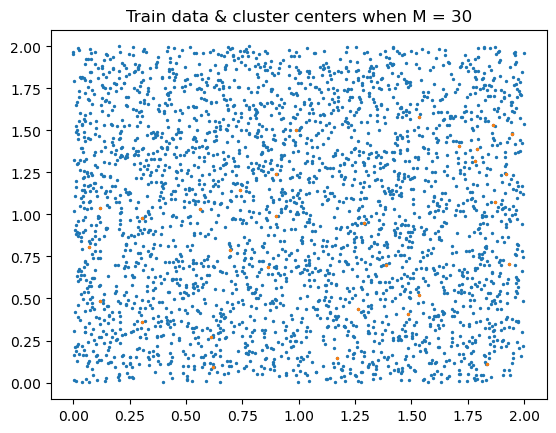

In [296]:
def plot_cluster(xdata, M, title):
    
    cv = KFold(n_splits=4)

    for i, (train_index, val_index) in enumerate(cv.split(xdata)): # i in range of 4
        D_train_xdata = xdata[train_index]

        miu = D_train_xdata[np.random.choice(len(D_train_xdata), size = M, replace = False)]
        plt.scatter(D_train_xdata[:, 0], D_train_xdata[:, 1], s = 2, label = 'train data')
        plt.scatter(miu[:, 0], miu[:, 1], s = 2, label = 'basis function centers')
        plt.title(title)
        plt.show()
        return

plot_cluster(xdata_train, 600, 'Train data & cluster centers when M = 600')
plot_cluster(xdata_train, 100, 'Train data & cluster centers when M = 100')
plot_cluster(xdata_train, 30, 'Train data & cluster centers when M = 30')

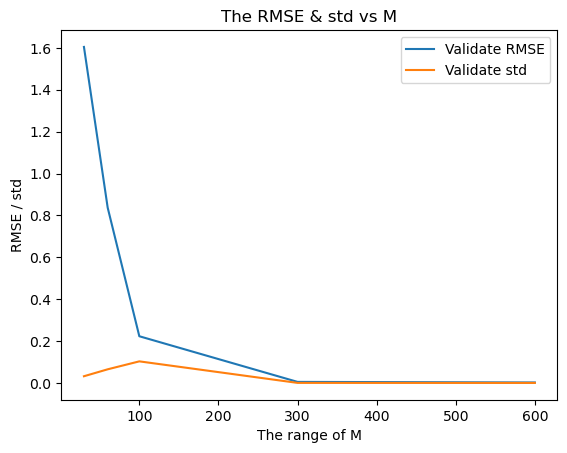

In [309]:
def plot_M_std(RMSE_val_list,RMSE_val_std):
    M_range = [30, 60, 100, 300, 600]
    mean = []
    std = []
    idx = 0
    for item in np.argmin(RMSE_val_list, axis = 1):
        mean.append(RMSE_val_list[idx][item])
        idx+=1
    
    idx = 0
    for item in np.argmin(RMSE_val_list, axis = 1):
        std.append(RMSE_val_std[idx][item])
        idx+=1
#     plt.plot(M_range, RMSE_val_list[:,np.argmin(RMSE_val_list, axis = 1)], label = 'Validate RMSE')
#     plt.plot(M_range, RMSE_val_std[:,np.argmin(RMSE_val_list, axis = 1)], label = 'Validate std')
    plt.plot(M_range, mean, label = 'Validate RMSE')
    plt.plot(M_range, std, label = 'Validate std')
    plt.legend()
    plt.xlabel("The range of M")
    plt.ylabel("RMSE / std")
    plt.title("The RMSE & std vs M")
    plt.show()
    
    
plot_M_std(RMSE_val_list_d,RMSE_val_std_d)

## Question e
Use K-means clustering to choose basis function centers for a given K; vary K using model selection (e.g., use values 30, 60, 100, 300, 600). For each value of K, choose your initial cluster centers randomly (i.e., in sklearn’s K-means).

In [313]:
def model_selection_e(xdata, ydata):
    K_range = [30, 60, 100, 300, 600]
    RMSE_train_list = np.zeros([len(K_range), 6])
    RMSE_val_list = np.zeros([len(K_range), 6])
    RMSE_train_std = np.zeros([len(K_range), 6])
    RMSE_val_std = np.zeros([len(K_range), 6])
    
    gamma_range_K = []
    
    for k in range(len(K_range)):
        
        gamma = gamma_d(K_range[k])
        gamma_range = np.array([0.01, 0.1, 1, 10, 100, 1000]) * np.array(gamma)
        print(f'Gamma range is {gamma_range}')
        gamma_range_K.append(gamma_range)
        
        idx = 0 # idx in range of 6
        for p in gamma_range:
            # Define the cross-validation object
            cv = KFold(n_splits=4)
            train_history = []
            val_history = []
            
            for i, (train_index, val_index) in enumerate(cv.split(xdata)): # i in range of 4
                D_train_xdata = xdata[train_index]
                D_train_ydata = ydata[train_index]
                D_val_xdata = xdata[val_index]
                D_val_ydata = ydata[val_index]
                
                kmeans = KMeans(n_clusters=K_range[k], init="random").fit(D_train_xdata)
                
#                 miu = D_train_xdata[np.random.choice(len(D_train_xdata), size = K_range[k], replace = False)]
                miu = kmeans.cluster_centers_

                model = Network(D_train_xdata, miu, p, D_train_ydata)

                kernel = rbf_kernel(D_val_xdata, miu, p) # 1000， 3000
                predict = model.predict(kernel)
                MSE = mean_squared_error(D_val_ydata, predict)
                val_history.append(np.sqrt(MSE))
                
                kernel_train = rbf_kernel(D_train_xdata, miu, p)
                predict_train = model.predict(kernel_train)
                MSE_train = mean_squared_error(D_train_ydata, predict_train)
                train_history.append(np.sqrt(MSE_train))
            
            # Calculate the mean value of each gamma
            RMSE_train_list[k][idx] = np.mean(train_history)
            RMSE_val_list[k][idx] = np.mean(val_history)
            RMSE_train_std[k][idx] = np.std(train_history)
            RMSE_val_std[k][idx] = np.std(val_history)
            idx += 1
    return gamma_range_K, RMSE_train_list, RMSE_val_list, RMSE_train_std, RMSE_val_std


In [314]:
gamma_range_e, RMSE_train_list_e, RMSE_val_list_e, RMSE_train_std_e, RMSE_val_std_e = model_selection_e(xdata_train, ydata_train)

Gamma range is [1.5e-03 1.5e-02 1.5e-01 1.5e+00 1.5e+01 1.5e+02]
Gamma range is [3.e-03 3.e-02 3.e-01 3.e+00 3.e+01 3.e+02]
Gamma range is [5.e-03 5.e-02 5.e-01 5.e+00 5.e+01 5.e+02]
Gamma range is [1.5e-02 1.5e-01 1.5e+00 1.5e+01 1.5e+02 1.5e+03]
Gamma range is [3.e-02 3.e-01 3.e+00 3.e+01 3.e+02 3.e+03]


In [318]:
print(f'The mean of train RMSE is {RMSE_train_list_e}')
print(f'The mean of validatation RMSE is {RMSE_val_list_e}')
print(f'The std of train RMSE is {RMSE_train_std_e}')
print(f'The std of validatation RMSE is {RMSE_val_std_e}')


print(np.argmin(RMSE_val_list_e))
print(np.asarray(gamma_range_e))
best_idx_k = 4
K_range = [30, 60, 100, 300, 600]
# gamma_range_array = np.asarray(gamma_range_d).reshape(-1)
print(f'The best gamma is {gamma_range_array[np.argmin(RMSE_train_list_e)]}, the K = {K_range[best_idx_k]}')

The mean of train RMSE is [[3.17663870e+00 2.28743449e+00 1.50812954e+00 1.62213280e+00
  1.70737407e+00 2.77255375e+00]
 [2.30468917e+00 1.75047769e+00 1.13160138e+00 8.06278503e-01
  7.71688629e-01 2.59907064e+00]
 [4.07421453e+00 1.43521740e+00 5.25773302e-01 1.61589376e-01
  4.50620011e-01 2.56324929e+00]
 [2.45798520e+00 1.21651572e+00 3.84991032e-02 3.95311604e-03
  3.59920142e-01 2.36214077e+00]
 [1.66095430e+00 6.85655228e-01 2.46499798e-03 1.22911695e-03
  3.62813619e-01 2.03885833e+00]]
The mean of validatation RMSE is [[3.16923859e+00 2.33095153e+00 1.51877461e+00 1.63575688e+00
  1.73887304e+00 2.86843057e+00]
 [2.34332994e+00 1.79674960e+00 1.16123748e+00 8.21192046e-01
  8.03159811e-01 2.68114546e+00]
 [4.08728352e+00 1.45649433e+00 5.65270843e-01 1.70310210e-01
  4.75244767e-01 2.71260080e+00]
 [2.49456692e+00 1.26578002e+00 4.32094314e-02 5.35701314e-03
  4.55467526e-01 2.86491319e+00]
 [1.66039080e+00 7.12829752e-01 3.37635740e-03 2.38184368e-03
  5.50008578e-01 3.7096

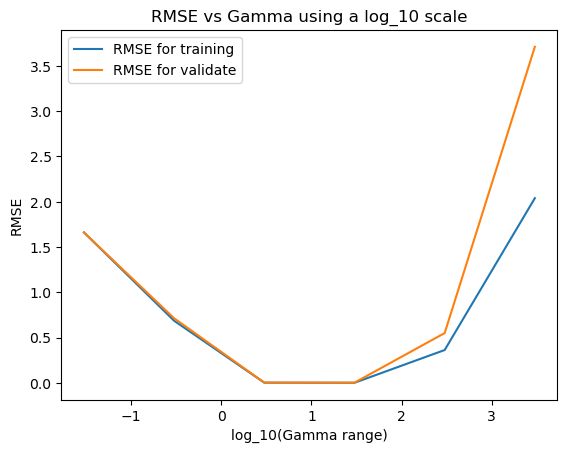

In [319]:
plot_RMSE_gamma(RMSE_train_list_e[best_idx_k],RMSE_val_list_e[best_idx_k], np.asarray(gamma_range_e)[best_idx_k])

In [320]:
def RCC_e(xdata, ydata):
    K_range = [30, 60, 100, 300, 600]
#     RMSE_train_list = np.zeros([len(M_range), 6])
#     RMSE_val_list = np.zeros([len(M_range), 6])
#     RMSE_train_std = np.zeros([len(M_range), 6])
#     RMSE_val_std = np.zeros([len(M_range), 6])
    
    checkpoint = RMSE_y(ydata)
    
#     gamma_range_K = []
    
    for k in range(len(K_range)):
        
        gamma = gamma_d(M_range[k])
        gamma_range = np.array([0.01, 0.1, 1, 10, 100, 1000]) * np.array(gamma)
        print(f'Gamma range is {gamma_range}')
#         gamma_range_M.append(gamma_range)
        idx = 0 # idx in range of 6
        for p in gamma_range:
            # Define the cross-validation object
            cv = KFold(n_splits=4)
#             train_history = []
            val_history = []
            
            for i, (train_index, val_index) in enumerate(cv.split(xdata)): # i in range of 4
                D_train_xdata = xdata[train_index]
                D_train_ydata = ydata[train_index]
                D_val_xdata = xdata[val_index]
                D_val_ydata = ydata[val_index]
                
                kmeans = KMeans(n_clusters=K_range[k], init="random").fit(D_train_xdata)
                
#                 miu = D_train_xdata[np.random.choice(len(D_train_xdata), size = K_range[k], replace = False)]
                miu = kmeans.cluster_centers_
                model = Network(D_train_xdata, miu, p, D_train_ydata)

                kernel = rbf_kernel(D_val_xdata, miu, p) # 1000， 3000
                predict = model.predict(kernel)
                MSE = mean_squared_error(D_val_ydata, predict)
                val_history.append(np.sqrt(MSE))
                
#                 kernel_train = rbf_kernel(D_train_xdata, miu, p)
#                 predict_train = model.predict(kernel_train)
#                 MSE_train = mean_squared_error(D_train_ydata, predict_train)
#                 train_history.append(np.sqrt(MSE_train))
            
            # Calculate the mean value of each gamma
            if(np.mean(val_history) < checkpoint / 10):
                return K_range[k], p


In [321]:
K_rcc_e, gamma_rcc_e = RCC_e(xdata_train, ydata_train)

Gamma range is [1.5e-03 1.5e-02 1.5e-01 1.5e+00 1.5e+01 1.5e+02]
Gamma range is [3.e-03 3.e-02 3.e-01 3.e+00 3.e+01 3.e+02]
Gamma range is [5.e-03 5.e-02 5.e-01 5.e+00 5.e+01 5.e+02]


In [322]:
print(f'The smallest K is {K_rcc_e}, the gamma = {gamma_rcc_e}')

The smallest K is 100, the gamma = 5.0


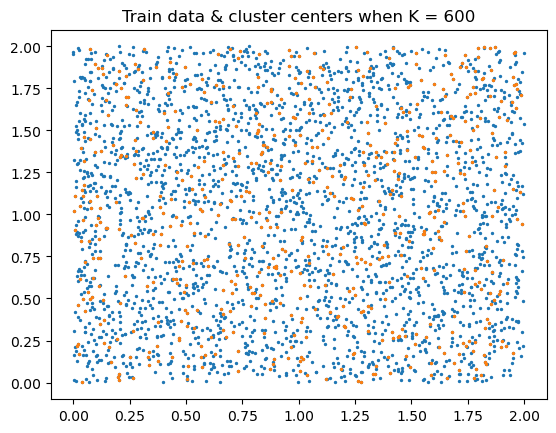

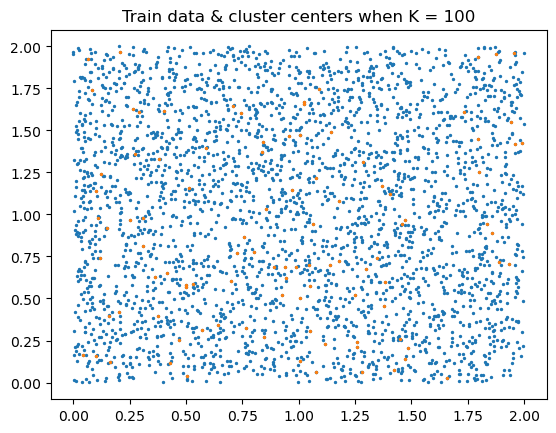

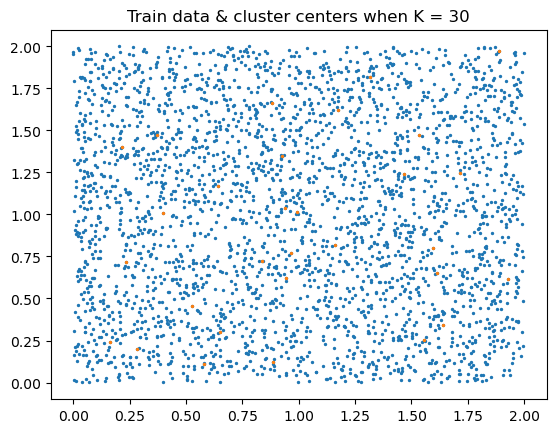

In [323]:
def plot_cluster_e(xdata, K, title):
    
    cv = KFold(n_splits=4)

    for i, (train_index, val_index) in enumerate(cv.split(xdata)): # i in range of 4
        D_train_xdata = xdata[train_index]

        kmeans = KMeans(n_clusters=K_range[k], init="random").fit(D_train_xdata)
                
        miu = kmeans.cluster_centers_
        plt.scatter(D_train_xdata[:, 0], D_train_xdata[:, 1], s = 2, label = 'train data')
        plt.scatter(miu[:, 0], miu[:, 1], s = 2, label = 'basis function centers')
        plt.title(title)
        plt.show()
        return

plot_cluster(xdata_train, 600, 'Train data & cluster centers when K = 600')
plot_cluster(xdata_train, 100, 'Train data & cluster centers when K = 100')
plot_cluster(xdata_train, 30, 'Train data & cluster centers when K = 30')

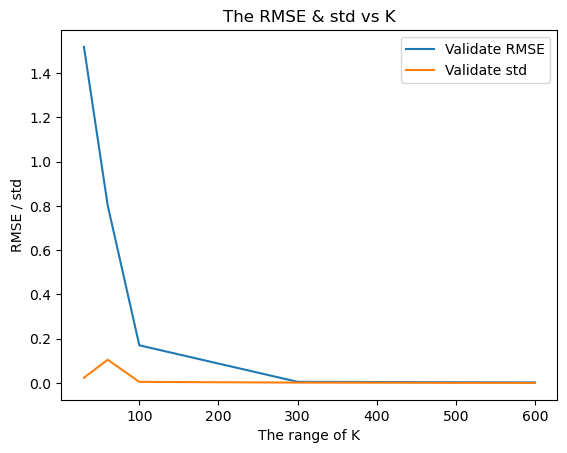

In [324]:
def plot_K_std(RMSE_val_list,RMSE_val_std):
    K_range = [30, 60, 100, 300, 600]
    mean = []
    std = []
    idx = 0
    for item in np.argmin(RMSE_val_list, axis = 1):
        mean.append(RMSE_val_list[idx][item])
        idx+=1
    
    idx = 0
    for item in np.argmin(RMSE_val_list, axis = 1):
        std.append(RMSE_val_std[idx][item])
        idx+=1
#     plt.plot(M_range, RMSE_val_list[:,np.argmin(RMSE_val_list, axis = 1)], label = 'Validate RMSE')
#     plt.plot(M_range, RMSE_val_std[:,np.argmin(RMSE_val_list, axis = 1)], label = 'Validate std')
    plt.plot(K_range, mean, label = 'Validate RMSE')
    plt.plot(K_range, std, label = 'Validate std')
    plt.legend()
    plt.xlabel("The range of K")
    plt.ylabel("RMSE / std")
    plt.title("The RMSE & std vs K")
    plt.show()
    
    
plot_K_std(RMSE_val_list_e,RMSE_val_std_e)

## Question g
Run the best model from each of (c), (d), and (e); and run the RCC model of (d), (e), on your test set. Report the RMSE of each (5 models total).

In [384]:
def test(xdata_train, ydata_train, xdata_test, ydata_test, miu, gamma):
    
    model = Network(xdata_train, miu, gamma, ydata_train)

    kernel = rbf_kernel(xdata_test, miu, gamma) 
    predict = model.predict(kernel)
    MSE = mean_squared_error(ydata_test, predict)
    return np.sqrt(MSE)

In [385]:
miu_c = xdata_train
gamma_c = 15.0
RMSE_c = test(xdata_train, ydata_train, xdata_test, ydata_test, miu_c, gamma_c)
print(f'The RMSE of best model from c is {RMSE_c}')

The RMSE of best model from c is 2.5778315496757243e-07


In [333]:
miu_d = xdata_train[np.random.choice(len(xdata_train), size = 600, replace = False)]
gamma_d = 30.0
RMSE_d = test(xdata_train, ydata_train, xdata_test, ydata_test, miu_d, gamma_d)
print(f'The RMSE of best model from d is {RMSE_d}')

The RMSE of best model from d is 0.0021838235900409615


In [334]:
kmeans_e = KMeans(n_clusters=600, init="random").fit(xdata_train)
miu_e = kmeans_e.cluster_centers_
gamma_e = 30.0
RMSE_e = test(xdata_train, ydata_train, xdata_test, ydata_test, miu_e, gamma_e)
print(f'The RMSE of best model from e is {RMSE_e}')

The RMSE of best model from e is 0.0018462935462773137


In [335]:
miu_d_rcc = xdata_train[np.random.choice(len(xdata_train), size = 100, replace = False)]
gamma_d_rcc = 5.0
RMSE_d_rcc = test(xdata_train, ydata_train, xdata_test, ydata_test, miu_d_rcc, gamma_d_rcc)
print(f'The RMSE of RCC model from d is {RMSE_d_rcc}')

The RMSE of RCC model from d is 0.17901963364551002


In [336]:
kmeans_e_rcc = KMeans(n_clusters=100, init="random").fit(xdata_train)
miu_e_rcc = kmeans_e_rcc.cluster_centers_
gamma_e_rcc = 5.0
RMSE_e_rcc = test(xdata_train, ydata_train, xdata_test, ydata_test, miu_e_rcc, gamma_e_rcc)
print(f'The RMSE of RCC model from e is {RMSE_e_rcc}')

The RMSE of RCC model from e is 0.1661766513476608


## Question i

In [340]:
def target_function(x1, x2):
    return 10 * np.cos(np.pi / 2 * x1) * np.sin(5 * np.pi / (x1**2 + 1)) * np.sin(np.pi * x2)

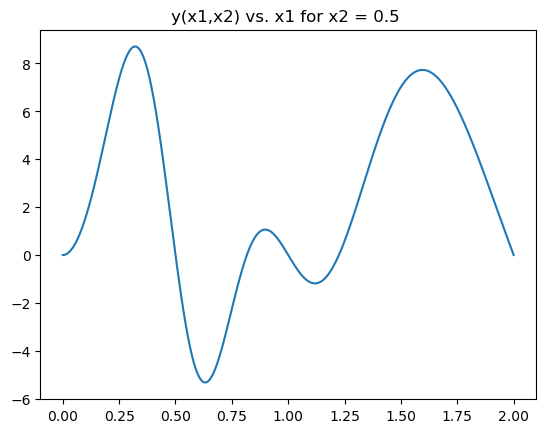

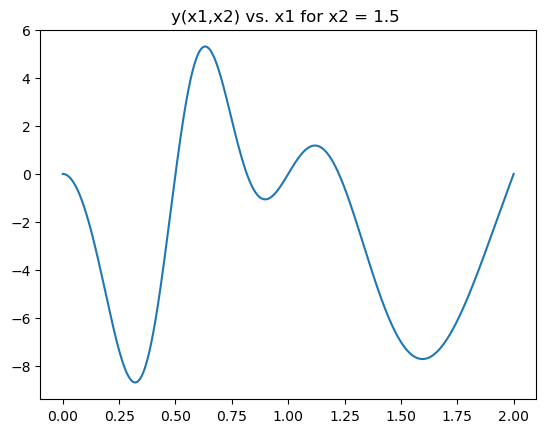

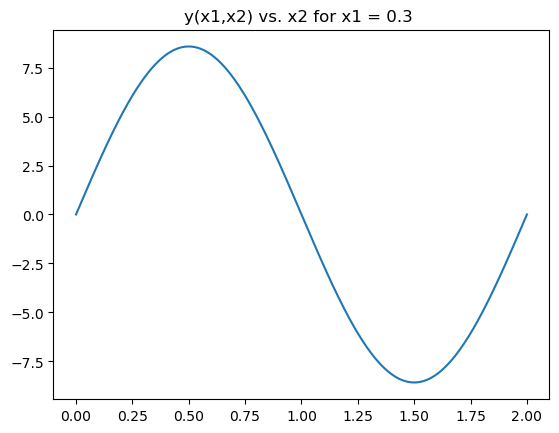

In [375]:
def plot_target_function():
    x1 = np.linspace(0,2, 5000)
    x2 = 0.5
    
    y = target_function(x1, x2)
    plt.plot(x1, y)
    plt.title("y(x1,x2) vs. x1 for x2 = 0.5 ")
    plt.show()
    
    x2 = 1.5
    y = target_function(x1, x2)
    plt.plot(x1, y)
    plt.title("y(x1,x2) vs. x1 for x2 = 1.5 ")
    plt.show()
    
    x2 = np.linspace(0,2, 5000)
    x1 = 0.3
    y = target_function(x1, x2)
    plt.plot(x2, y)
    plt.title("y(x1,x2) vs. x2 for x1 = 0.3 ")
    plt.show()
    
    
plot_target_function()

In [378]:
def predict(xdata, ydata, miu, gamma ):
    model = Network(xdata, miu, gamma, ydata)
    x1 = np.linspace(0,2, 4000)
    x2 = 0.5
    dataset = np.column_stack((x1, np.full_like(x1, x2)))
#     print(dataset)
    kernel = rbf_kernel(dataset, miu, gamma) 
    predict = model.predict(kernel)
    plt.plot(x1, predict, label = 'predict vs x1')
    
    y = target_function(x1, x2)
    plt.plot(x1, y, label = "y(x1, x2) vs x1")
    plt.legend()
    plt.show()

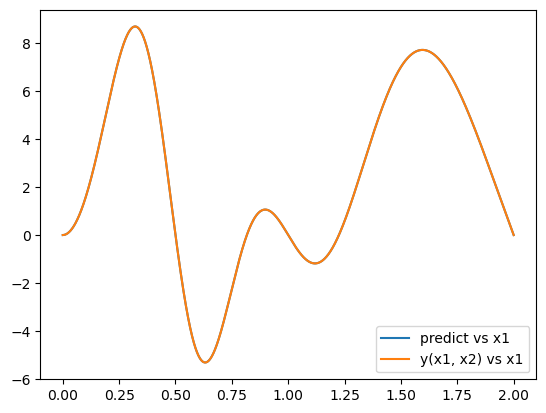

In [379]:
predict(xdata_train, ydata_train, miu_c, gamma_c)

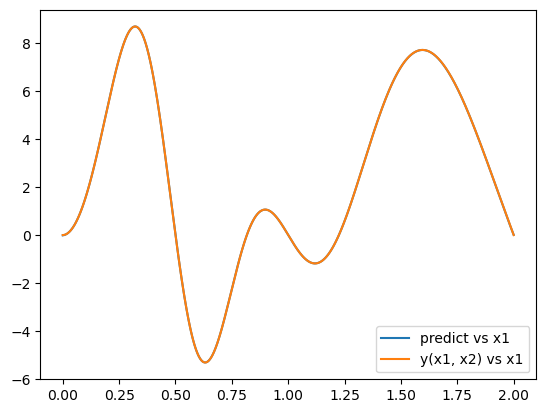

In [371]:
predict(xdata_train, ydata_train, miu_d, gamma_d)

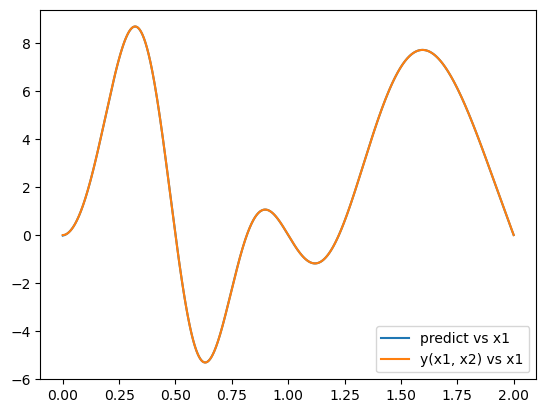

In [372]:
predict(xdata_train, ydata_train, miu_e, gamma_e)

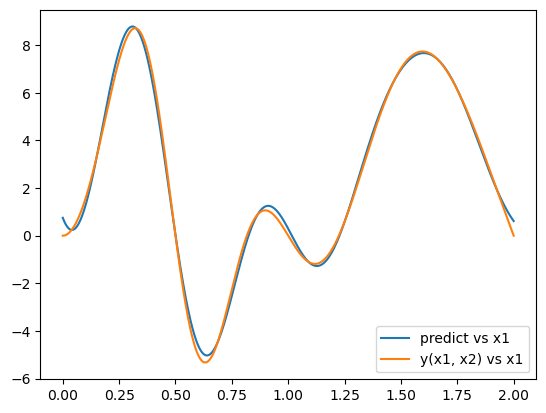

In [373]:
predict(xdata_train, ydata_train, miu_d_rcc, gamma_d_rcc)

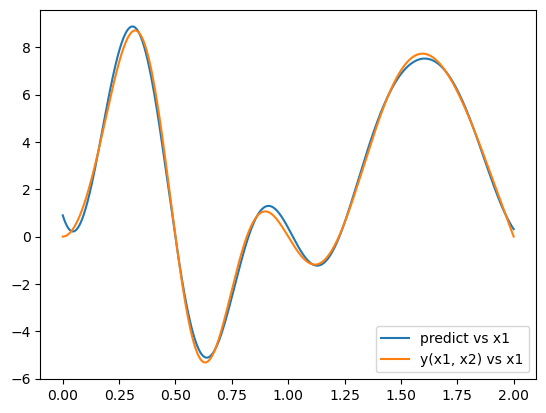

In [374]:
predict(xdata_train, ydata_train, miu_e_rcc, gamma_e_rcc)